# Importing all the Libraries

In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Reading the 4 Separate sheets of the xlsx dataset

In [2]:
Customers = pd.read_excel('C:\\Users\\tejan\\Downloads\\Data_Intern_Case_Data.xlsx', sheet_name='Customers')
PolicyDetails = pd.read_excel('C:\\Users\\tejan\\Downloads\\Data_Intern_Case_Data.xlsx', sheet_name='PolicyDetails')
Claims = pd.read_excel('C:\\Users\\tejan\\Downloads\\Data_Intern_Case_Data.xlsx', sheet_name='Claims')
Fraud = pd.read_excel('C:\\Users\\tejan\\Downloads\\Data_Intern_Case_Data.xlsx', sheet_name='Fraud')
print("Column headings:")
print(Customers.columns)
print(PolicyDetails.columns)
print(Claims.columns)
print(Fraud.columns)

Column headings:
Index(['CustomerID', 'State', 'Salary', 'Gender', 'Smoker', 'Age',
       'Occupation'],
      dtype='object')
Index(['PolicyID', 'CustomerID', 'Agent', 'Elimination Period',
       'Income Replacement Percent', 'Monthly Benefit', 'Annualized Premium',
       'Product', 'Policy Effective Date'],
      dtype='object')
Index(['PolicyID', 'Date of Loss', 'Diagnosis Category',
       'Length of Disability (in Days)', 'Fraud', 'Amount Paid',
       'Amount Recovered'],
      dtype='object')
Index(['PolicyID', 'Fraud', 'Amount Paid', 'Amount Recovered'], dtype='object')


# As asked in the problem statement, only considering those cases that have a Disability insurance product brought

In [3]:
PolicyDetails = PolicyDetails.query('Product == "Disability"')

# Merging the Customers data and Policydetails data on "CustomerID"

In [4]:
df1 = pd.merge(Customers, PolicyDetails, on = "CustomerID", how = "inner")

In [5]:
df1.shape

(30838, 15)

# Merging the data with Fraud data on "PolicyID"

In [6]:
df2 =pd.merge(df1, Fraud, on = "PolicyID", how = "inner")

# Dropping the duplicate rows, by keeping the first instance of the duplicate rows

In [7]:
df2.drop_duplicates(keep = "first", inplace = True)

# Dropping the irrelevant columns like date variables, IDs, and variables that realize after the target variable

In [8]:

df2.drop(columns = ["CustomerID", "PolicyID", "Policy Effective Date", "Product", "Amount Recovered", "State"], axis = 1, inplace = True)

In [9]:
df2.head()

,Salary,Gender,Smoker,Age,Occupation,Agent,Elimination Period,Income Replacement Percent,Monthly Benefit,Annualized Premium,Fraud,Amount Paid
0,43916.0,1,1,36,Teacher,Alicia Purple,14 days,0.67,2452.0,2118.52800,1,20433.333333
2,62139.0,0,0,41,Teacher,Alicia Purple,30 days,0.67,3469.0,1398.70080,1,52150.633333
4,36989.0,0,1,44,Teacher,Max Colorado,14 days,0.67,2065.0,1784.16000,1,10600.333333
6,42800.0,0,0,50,Teacher,Max Colorado,45 days,0.50,1783.0,684.67200,1,19315.833333
8,42681.0,0,0,43,Teacher,Nico Vulture,30 days,0.67,2383.0,1152.99072,1,9134.833333


# Looking at the summary statistics of the data, to get an idea about the data distribution

In [10]:
df2.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Salary,30838,NaN,NaN,NaN,46562.2,12676.2,14102,38424.5,47720.5,55411.2,300000
Gender,30838,NaN,NaN,NaN,0.512031,0.499863,0,0,1,1,1
Smoker,30838,NaN,NaN,NaN,0.250243,0.43316,0,0,0,1,1
Age,30838,NaN,NaN,NaN,45.9192,7.95455,18,41,46,51,79
Occupation,30838,11,Teacher,17322,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agent,30838,5,Alicia Purple,11877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Elimination Period,30838,3,14 days,17206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income Replacement Percent,30838,NaN,NaN,NaN,0.640903,0.0684406,0.5,0.67,0.67,0.67,0.7
Monthly Benefit,30838,NaN,NaN,NaN,2486.69,732.374,531,1970,2526,3009,17500
Annualized Premium,30838,NaN,NaN,NaN,1696.42,883.582,178.464,1014.52,1564.42,2209.54,9878.4


# Checking for any null values - There are none

In [11]:
df2.isnull().sum()

Salary                        0
Gender                        0
Smoker                        0
Age                           0
Occupation                    0
Agent                         0
Elimination Period            0
Income Replacement Percent    0
Monthly Benefit               0
Annualized Premium            0
Fraud                         0
Amount Paid                   0
dtype: int64

# The final data has 30,838 rows and 12 columns

In [12]:
df2.shape

(30838, 12)

# There is a class imbalance in the data, Event proportion is 14.78% and non event proportion is 85.22% in the binary Target

In [13]:
df2.Fraud.value_counts(normalize = True)

0    0.85213
1    0.14787
Name: Fraud, dtype: float64

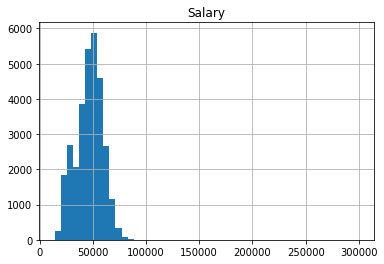

In [51]:
ax = df1.hist("Salary", bins = 50)

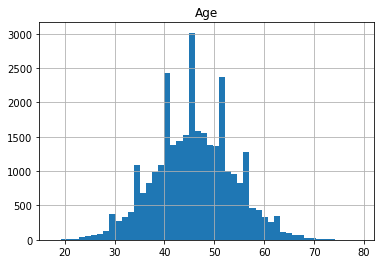

In [52]:
ax = df1.hist("Age", bins = 50)

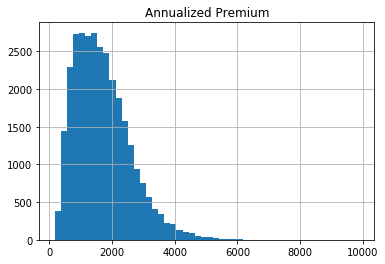

In [53]:
ax = df1.hist("Annualized Premium", bins = 50)

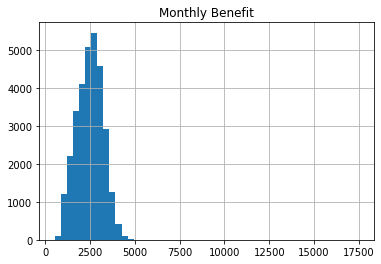

In [55]:
ax = df1.hist("Monthly Benefit", bins = 50)

# Identifying continuous columns and categorical columns based on my understanding of the data

In [14]:
Cont_cols = ['Salary', 'Age', 'Monthly Benefit', 'Annualized Premium', 'Amount Paid']
Cat_cols = [  'Occupation', 'Agent', 'Elimination Period', 'Income Replacement Percent']

# Standard scaling the continuous variables to make them have equal impact in the modeling process

In [15]:
scaler = preprocessing.StandardScaler()
for col in Cont_cols:
    df2[col] = scaler.fit_transform(df2[col].values.reshape(-1,1))  

# Converting the categorical colums to category and then, encoding them to numeric variables, then dropping the original variables

In [16]:
for col in Cat_cols:
    df2[col] = df2[col].astype('category')

In [17]:
dum1_df2 = pd.get_dummies(df2['Occupation'] )
dum2_df2 = pd.get_dummies(df2["Agent"] )
dum3_df2 = pd.get_dummies(df2["Elimination Period"] )
dum4_df2 = pd.get_dummies(df2["Income Replacement Percent"])

In [132]:
# dum4_df2 = dum4_df2.reset_index()
# dum4_df2.drop(columns = ["index"], axis = 1)
# dum1_df2 = dum1_df2.reset_index()
# dum1_df2.drop(columns = ["index"], axis = 1)
# dum2_df2 = dum2_df2.reset_index()
# dum2_df2.drop(columns = ["index"], axis = 1)
# dum3_df2 = dum3_df2.reset_index()
# dum3_df2.drop(columns = ["index"], axis = 1)

In [18]:
df2 = pd.concat([df2, dum1_df2], axis = 1)
df2 = pd.concat([df2, dum2_df2], axis = 1)
df2 = pd.concat([df2, dum3_df2], axis = 1)
df2 = pd.concat([df2, dum4_df2], axis = 1)

In [21]:
df2.drop(columns = ['Agent', 'Elimination Period', 'Occupation','Income Replacement Percent'], axis = 1, inplace = True)

# Separating the data to input data and target data

In [27]:
X = df2.loc[:, df2.columns != 'Fraud'].values
y = df2['Fraud'].values.reshape(-1)

# Splitting the data to training and validation data, doing a validation prportion of 20% and using a stratified split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

# Oversampling the training data using SMOTETomek technique

In [29]:
smt = SMOTETomek(random_state=123)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

print('Original training dataset shape %s' % Counter(y_train))
print('Original testing dataset shape %s' % Counter(y_test))
print('SmoteTomek dataset shape %s' % Counter(y_smt))

Original training dataset shape Counter({0: 21022, 1: 3648})
Original testing dataset shape Counter({0: 5256, 1: 912})
SmoteTomek dataset shape Counter({0: 20369, 1: 20369})


# Since all the data is numeric, we can use Naive Bayes classifier from sklearn to do the classification between Fraud and non-Fraud cases

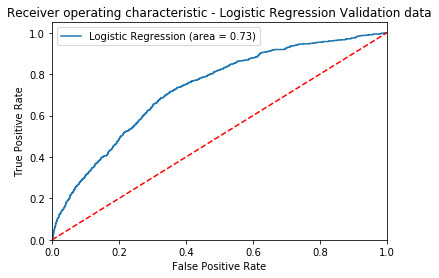

<Figure size 432x288 with 0 Axes>

In [156]:
roc_auc = roc_auc_score(y_test, clf_1.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf_1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Logistic Regression Validation data')
plt.legend(loc="upper left")
plt.savefig('Log_ROC')
plt.figure()
plt.show()

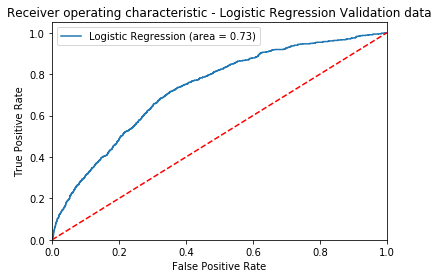

<Figure size 432x288 with 0 Axes>

In [166]:
roc_auc = roc_auc_score(y_test, clf_2.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf_2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Logistic Regression Validation data')
plt.legend(loc="upper left")
plt.savefig('Log_ROC')
plt.figure()
plt.show()

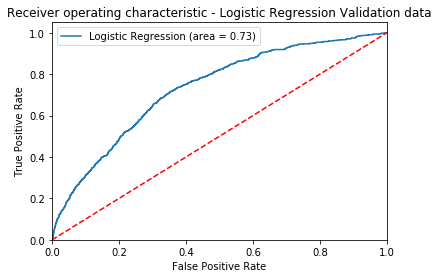

<Figure size 432x288 with 0 Axes>

In [167]:
roc_auc = roc_auc_score(y_test, clf_3.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, clf_3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Logistic Regression Validation data')
plt.legend(loc="upper left")
plt.savefig('Log_ROC')
plt.figure()
plt.show()

# Let's build a random forest model. I will use 500 estimators, and bootstrapping

In [169]:

rf_clf = RandomForestClassifier(n_estimators = 500, bootstrap = True, n_jobs = -1, random_state=0)
rf_clf.fit(X_smt, y_smt)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [172]:
predictions = rf_clf.predict(X_smt)
probs = rf_clf.predict_proba(X_smt)[:, 1]
roc_value = roc_auc_score(y_smt, probs)
recallscore = recall_score(y_smt, predictions)
precisionscore = precision_score(y_smt, predictions)
accuracy = rf_clf.score(X_smt, y_smt )
f1score = f1_score(y_smt, predictions)
print("The metrics on the training data are:")
print("Roc Auc on training data is :", roc_value)
print("Recall on training data is ", recallscore)
print("Precision on training data is :", precisionscore)
print("Accuracy on trainng data is :", accuracy)
print("F1 SCore on Training data is :", f1score)


predictions_test = rf_clf.predict(X_test)
probs_test = rf_clf.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, probs_test)
recallscore = recall_score(y_test, predictions_test)
precisionscore = precision_score(y_test, predictions_test)
accuracy = rf_clf.score(X_test, y_test )
f1score = f1_score(y_test, predictions_test)
print("The metrics on the validation data are:")
print("Roc Auc on validation data is :", roc_value)
print("Recall on validation data is ", recallscore)
print("Precision on validation data is :", precisionscore)
print("Accuracy on validation data is :", accuracy)
print("F1 SCore on validation data is :", f1score)



The metrics on the training data are:
Roc Auc on training data is : 1.0
Recall on training data is  1.0
Precision on training data is : 1.0
Accuracy on trainng data is : 1.0
F1 SCore on Training data is : 1.0
The metrics on the validation data are:
Roc Auc on validation data is : 0.6923372035968917
Recall on validation data is  0.3399122807017544
Precision on validation data is : 0.2753108348134991
Accuracy on validation data is : 0.7701037613488976
F1 SCore on validation data is : 0.3042198233562316


# Let's see the variable importance of each variable 

In [174]:
cols = list(df2.columns.values)
cols.remove('Fraud')
feature_importance = pd.DataFrame({'Variables': cols, 'Variable_Importance': rf_clf.feature_importances_}).sort_values('Variable_Importance', ascending = False)

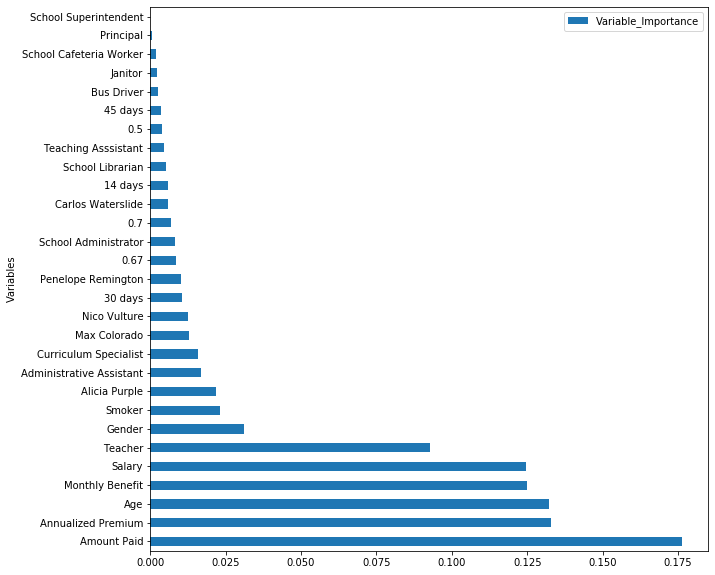

In [175]:
ax = feature_importance.plot.barh(x='Variables', y='Variable_Importance', figsize = (10,10))

# Lets do 10 fold cross-validation on the randome forest model. We have to do smotetomek oversampling within the cross validation steps. So, I have used a pipeline to automate the process. I will see only the recall of the models built. I am inputting the entire data without any sampling, because the pipeline does SMOTETOmek sampling for every fold of the cross validation step

In [178]:

kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
pipeline = make_pipeline(SMOTETomek(random_state=1), 
                              RandomForestClassifier(n_estimators = 100, bootstrap = True,oob_score = True, n_jobs = -1, random_state=0))
cross_val_score(pipeline, X, y, scoring='recall', cv=kf)

array([0.22587719, 0.32894737, 0.34210526, 0.33114035, 0.35526316,
       0.36842105, 0.37280702, 0.33114035, 0.3245614 , 0.33552632])

# Now lets perform Gradient Boosting. Learning rate is a hyper parameter that we need to choose. So, I will build a couple of models for several values of learning rates and see which learning rate has the least overfitting

In [180]:

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=200, subsample = 0.8, learning_rate=learning_rate, max_features="sqrt", max_depth=2, random_state=0)
    gb_clf.fit(X_smt, y_smt)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_smt, y_smt)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    print("Recall (validation): {0:.3f}".format(recall_score( y_test,gb_clf.predict(X_test))))

Learning rate:  0.05
Accuracy score (training): 0.720
Accuracy score (validation): 0.626
Recall (validation): 0.713
Learning rate:  0.075
Accuracy score (training): 0.731
Accuracy score (validation): 0.640
Recall (validation): 0.695
Learning rate:  0.1
Accuracy score (training): 0.738
Accuracy score (validation): 0.654
Recall (validation): 0.683
Learning rate:  0.25
Accuracy score (training): 0.767
Accuracy score (validation): 0.686
Recall (validation): 0.627
Learning rate:  0.5
Accuracy score (training): 0.786
Accuracy score (validation): 0.706
Recall (validation): 0.565
Learning rate:  0.75
Accuracy score (training): 0.800
Accuracy score (validation): 0.708
Recall (validation): 0.516
Learning rate:  0.9
Accuracy score (training): 0.800
Accuracy score (validation): 0.719
Recall (validation): 0.530
Learning rate:  1
Accuracy score (training): 0.802
Accuracy score (validation): 0.713
Recall (validation): 0.519


# Choosing a learning rate of 0.9, since it has the highest validation accuracy and recall

In [182]:

gb_clf2 = GradientBoostingClassifier(n_estimators=100, subsample = 0.5, learning_rate=0.9, max_features="sqrt", max_depth=3, random_state=0)
gb_clf2.fit(X_smt, y_smt)
predictions = gb_clf2.predict(X_test)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predictions))

print("Classification Report")
print(metrics.classification_report(y_test, predictions))

Confusion Matrix:
[[4025 1231]
 [ 478  434]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.77      0.82      5256
           1       0.26      0.48      0.34       912

    accuracy                           0.72      6168
   macro avg       0.58      0.62      0.58      6168
weighted avg       0.80      0.72      0.75      6168



In [30]:

gb_clf3 = GradientBoostingClassifier(n_estimators=100, subsample = 0.5, learning_rate=0.9, max_features=2, max_depth=4, random_state=0)
gb_clf3.fit(X_smt, y_smt)
predictions = gb_clf3.predict(X_test)

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predictions))

print("Classification Report")
print(metrics.classification_report(y_test, predictions))

Confusion Matrix:
[[3805 1451]
 [ 431  481]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      5256
           1       0.25      0.53      0.34       912

    accuracy                           0.69      6168
   macro avg       0.57      0.63      0.57      6168
weighted avg       0.80      0.69      0.73      6168



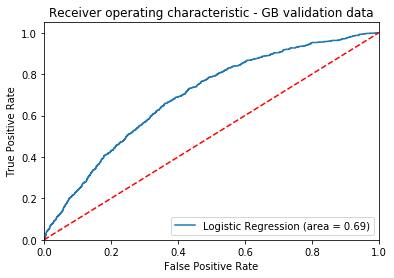

<Figure size 432x288 with 0 Axes>

In [183]:
roc_auc = roc_auc_score(y_test, gb_clf2.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gb_clf2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - GB validation data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.figure()
plt.show()

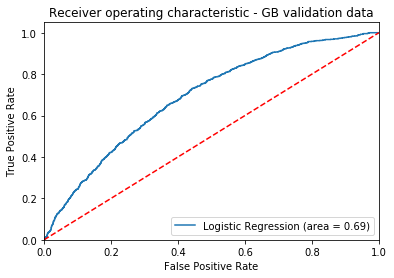

<Figure size 432x288 with 0 Axes>

In [31]:
roc_auc = roc_auc_score(y_test, gb_clf3.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, gb_clf3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - GB validation data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.figure()
plt.show()